In [3]:
# Install required packages
!pip install -q psycopg2-binary sqlalchemy pandas dspy-ai

# Import necessary libraries
import pandas as pd
from sqlalchemy import create_engine

# Database configuration
db_config = {
    'host': 'host.docker.internal',  # Special DNS name to access the host
    'port': 5432,
    'user': 'puntal',     # Your username
    'password': '12345678', # Your password
    'database': 'brownberg'  # Your database name
}

# Create connection string
connection_string = f"postgresql://{db_config['user']}:{db_config['password']}@{db_config['host']}:{db_config['port']}/{db_config['database']}"

# Create SQLAlchemy engine
engine = create_engine(connection_string)

# Test the connection and show available tables
try:
    # List all tables in the database
    tables_query = "SELECT table_name FROM information_schema.tables WHERE table_schema = 'public'"
    tables_df = pd.read_sql(tables_query, engine)
    
    print("Connection successful!")
    print("\nAvailable tables:")
    print(tables_df)
    
    # Let's peek at some data from each table
    for table_name in tables_df['table_name']:
        print(f"\n--- Sample data from {table_name} ---")
        # Get first 5 rows from each table
        sample_query = f"SELECT * FROM {table_name} LIMIT 5"
        try:
            sample_df = pd.read_sql(sample_query, engine)
            print(f"Column names: {', '.join(sample_df.columns)}")
            print(f"Number of rows retrieved: {len(sample_df)}")
            display(sample_df)  # This works in Jupyter notebooks
        except Exception as e:
            print(f"Error querying table {table_name}: {str(e)}")
            
except Exception as e:
    print(f"Connection error: {str(e)}")

Connection successful!

Available tables:
           table_name
0           exchanges
1             symbols
2       custom_alerts
3   last_quote_update
4              income
5           cash_flow
6             balance
7              ratios
8             metrics
9        price_target
10            profile
11              peers

--- Sample data from exchanges ---
Column names: exchange, exchange_name, country
Number of rows retrieved: 5


,exchange,exchange_name,country
0,BME,Bolsa de Madrid,Spain
1,EURONEXT,Euronext,Europe
2,LSE,London Stock Exchange,United Kingdom
3,NASDAQ,Nasdaq Stock Market,USA
4,NYSE,New York Stock Exchange,USA



--- Sample data from symbols ---
Column names: symbol, exchange, name, sector, industry, country, is_etf, actively_trading, is_fund
Number of rows retrieved: 5


,symbol,exchange,name,sector,industry,country,is_etf,actively_trading,is_fund
0,ITX.MC,BME,"Industria de Diseño Textil, S.A.",Consumer Cyclical,Apparel - Retail,ES,False,True,False
1,IBE.MC,BME,"Iberdrola, S.A.",Utilities,Diversified Utilities,ES,False,True,False
2,SAN.MC,BME,"Banco Santander, S.A.",Financial Services,Banks - Diversified,ES,False,True,False
3,BBVA.MC,BME,"Banco Bilbao Vizcaya Argentaria, S.A.",Financial Services,Banks - Diversified,ES,False,True,False
4,CABK.MC,BME,"CaixaBank, S.A.",Financial Services,Banks - Regional,ES,False,True,False



--- Sample data from custom_alerts ---
Column names: timestamp, exchange, symbol, alert_type, var_name, var_value
Number of rows retrieved: 0


,timestamp,exchange,symbol,alert_type,var_name,var_value



--- Sample data from last_quote_update ---
Column names: provider, symbol, exchange, last_timestamp, last_price, bid, ask, open, high, low, close, volume, change, change_percent, year_high, year_low, price_avg50, price_avg200, market_cap, shares_outstanding, eps, pe, prev_close, exchange_volume, earnings_announcement
Number of rows retrieved: 5


,provider,symbol,exchange,last_timestamp,last_price,bid,ask,open,high,low,...,year_low,price_avg50,price_avg200,market_cap,shares_outstanding,eps,pe,prev_close,exchange_volume,earnings_announcement
0,fmp,ITX.MC,BME,2025-03-12 16:40:45,45.000,None,None,45.740,45.740,44.340,...,41.930,51.27560,49.76910,1.401635e+11,3114744154,1.83,24.59,48.650,None,2025-03-12 07:30:00
1,fmp,IBE.MC,BME,2025-03-12 16:35:40,13.760,None,None,13.840,13.915,13.685,...,10.765,13.51540,13.07165,8.604383e+10,6253185564,0.84,16.38,13.775,None,2025-04-22 06:30:00
2,fmp,SAN.MC,BME,2025-03-12 16:41:31,6.002,None,None,5.950,6.082,5.927,...,3.800,5.32340,4.67595,9.085210e+10,15136970541,0.77,7.79,5.862,None,2025-04-30 06:30:00
3,fmp,BBVA.MC,BME,2025-03-12 16:41:52,12.875,None,None,12.645,12.985,12.620,...,8.464,11.33026,9.86064,7.411652e+10,5756623144,1.68,7.66,12.535,None,2025-04-29 07:30:00
4,fmp,CABK.MC,BME,2025-03-12 16:42:19,6.964,None,None,6.950,7.020,6.878,...,4.371,6.06288,5.47790,4.956848e+10,7117817396,0.76,9.16,6.926,None,2025-04-28 06:30:00



--- Sample data from income ---
Column names: symbol, provider, fiscal_period, fiscal_year, reported_currency, revenue, gross_profit, gross_profit_margin, ebitda, ebitda_margin, total_operating_income, operating_income_margin, consolidated_net_income, net_income_margin, basic_earnings_per_share, diluted_earnings_per_share, link
Number of rows retrieved: 5


,symbol,provider,fiscal_period,fiscal_year,reported_currency,revenue,gross_profit,gross_profit_margin,ebitda,ebitda_margin,total_operating_income,operating_income_margin,consolidated_net_income,net_income_margin,basic_earnings_per_share,diluted_earnings_per_share,link
0,MTS.MC,fmp,FY,2023,USD,6.827500e+10,4.737000e+09,0.0694,4.650000e+09,0.0681,2.340000e+09,0.0343,9.190000e+08,0.0135,1.09,1.09,
1,ELE.MC,fmp,FY,2023,EUR,2.507000e+10,9.103000e+09,0.3630,3.324000e+09,0.1326,1.645000e+09,0.0656,7.420000e+08,0.0296,0.70,0.70,
2,ELE.MC,fmp,FY,2022,EUR,3.254000e+10,9.146000e+09,0.2811,5.398000e+09,0.2459,6.124000e+09,0.1882,2.541000e+09,0.0781,2.40,2.40,
3,ELE.MC,fmp,FY,2021,EUR,2.052200e+10,5.158000e+09,0.2510,3.599000e+09,0.2251,1.956000e+09,0.0953,1.435000e+09,0.0699,1.36,1.36,
4,ELE.MC,fmp,FY,2020,EUR,1.664400e+10,5.071000e+09,0.3047,3.341000e+09,0.2614,1.886000e+09,0.1133,1.394000e+09,0.0838,1.32,1.32,



--- Sample data from cash_flow ---
Column names: symbol, provider, fiscal_period, fiscal_year, reported_currency, free_cash_flow, operating_cash_flow, capital_expenditure, link
Number of rows retrieved: 5


,symbol,provider,fiscal_period,fiscal_year,reported_currency,free_cash_flow,operating_cash_flow,capital_expenditure,link
0,BKT.MC,fmp,FY,2023,EUR,5.680370e+08,6.584190e+08,-2.171300e+07,
1,BKT.MC,fmp,FY,2022,EUR,-8.107226e+09,-8.034976e+09,-7.225000e+07,
2,BKT.MC,fmp,FY,2021,EUR,6.983511e+09,7.050834e+09,-6.732300e+07,
3,BKT.MC,fmp,FY,2020,EUR,8.451624e+09,8.538308e+09,-8.668400e+07,
4,MTS.MC,fmp,FY,2023,USD,3.032000e+09,7.645000e+09,-4.613000e+09,



--- Sample data from balance ---
Column names: symbol, provider, fiscal_period, fiscal_year, reported_currency, total_assets, total_current_assets, non_current_assets, total_current_liabilities, short_term_debt, long_term_debt, total_liabilities, total_debt, net_debt, total_investments, total_common_equity, common_stock, preferred_stock, link
Number of rows retrieved: 5


,symbol,provider,fiscal_period,fiscal_year,reported_currency,total_assets,total_current_assets,non_current_assets,total_current_liabilities,short_term_debt,long_term_debt,total_liabilities,total_debt,net_debt,total_investments,total_common_equity,common_stock,preferred_stock,link
0,FER.MC,fmp,FY,2024,EUR,2.899900e+10,7.672000e+09,2.132700e+10,6.301000e+09,1.275000e+09,1.025700e+10,2.087900e+10,1.153200e+10,6.722000e+09,3.633000e+09,6.075000e+09,7.000000e+06,None,
1,FER.MC,fmp,FY,2023,EUR,2.631800e+10,6.990000e+09,1.932800e+10,5.775000e+09,1.001000e+09,1.056500e+10,2.043900e+10,1.156500e+10,6.807000e+09,2.083000e+09,3.766000e+09,7.000000e+06,None,
2,FER.MC,fmp,FY,2022,EUR,2.628400e+10,7.419000e+09,1.886500e+10,5.378000e+09,9.410000e+08,1.089600e+10,1.993000e+10,1.183700e+10,6.745000e+09,1.892000e+09,4.113000e+09,1.450000e+08,None,
3,FER.MC,fmp,FY,2021,EUR,2.489600e+10,9.102000e+09,1.579400e+10,6.577000e+09,1.184000e+09,9.699000e+09,1.905700e+10,1.074600e+10,5.278000e+09,1.838000e+09,4.048000e+09,1.470000e+08,None,
4,AENA.MC,fmp,FY,2024,EUR,1.697536e+10,2.803246e+09,1.417212e+10,2.234385e+09,NaN,NaN,8.767164e+09,NaN,-1.821283e+09,4.579090e+08,8.276386e+09,1.500000e+09,None,



--- Sample data from ratios ---
Column names: symbol, provider, fiscal_period, fiscal_year, reported_currency, return_on_equity, return_on_capital_employed, return_on_assets, dividend_per_share, dividend_yield, payout_ratio, dividend_payout_ratio, price_book_value_ratio, price_earnings_ratio, price_to_free_cash_flows_ratio, price_cash_flow_ratio
Number of rows retrieved: 5


,symbol,provider,fiscal_period,fiscal_year,reported_currency,return_on_equity,return_on_capital_employed,return_on_assets,dividend_per_share,dividend_yield,payout_ratio,dividend_payout_ratio,price_book_value_ratio,price_earnings_ratio,price_to_free_cash_flows_ratio,price_cash_flow_ratio
0,SAN.MC,fmp,FY,2024,None,0.1275,NaN,0.0068,None,NaN,NaN,NaN,0.7386,5.7922,NaN,NaN
1,SAN.MC,fmp,FY,2023,None,0.1161,NaN,0.0062,None,NaN,NaN,NaN,0.6525,5.6214,NaN,NaN
2,SAN.MC,fmp,FY,2022,None,0.1078,NaN,0.0055,None,NaN,NaN,NaN,0.5294,4.9115,NaN,NaN
3,SAN.MC,fmp,FY,2021,None,0.0935,NaN,0.0051,None,NaN,NaN,NaN,0.5841,6.2506,NaN,NaN
4,ACS.MC,fmp,FY,2023,None,0.1464,0.2041,0.0214,None,0.0377,0.5056,0.5056,1.9617,13.4011,10.3838,6.9588



--- Sample data from metrics ---
Column names: symbol, provider, fiscal_period, calendar_year, currency, market_cap, ev_to_ebitda, ev_to_operating_cash_flow, working_capital, enterprise_value, peg_ratio, eps_forward, overall_risk, beta
Number of rows retrieved: 0


,symbol,provider,fiscal_period,calendar_year,currency,market_cap,ev_to_ebitda,ev_to_operating_cash_flow,working_capital,enterprise_value,peg_ratio,eps_forward,overall_risk,beta



--- Sample data from price_target ---
Column names: id, published_date, symbol, provider, analyst_name, analyst_firm, price_target, price_target_previous, price_when_posted, rating_current, rating_previous, news_base_url
Number of rows retrieved: 0


,id,published_date,symbol,provider,analyst_name,analyst_firm,price_target,price_target_previous,price_when_posted,rating_current,rating_previous,news_base_url



--- Sample data from profile ---
Column names: symbol, provider, cik, cusip, isin, legal_name, name, stock_exchange, sic, short_description, long_description, inc_country, employees, irs_number, sector, industry_category, industry_group, currency
Number of rows retrieved: 0


,symbol,provider,cik,cusip,isin,legal_name,name,stock_exchange,sic,short_description,long_description,inc_country,employees,irs_number,sector,industry_category,industry_group,currency



--- Sample data from peers ---
Column names: symbol, provider, peers_list
Number of rows retrieved: 5


,symbol,provider,peers_list
0,ANA.MC,fmp,FER.MC
1,SCYR.MC,fmp,MTS.MC
2,FER.MC,fmp,ACS.MC
3,VIS.MC,fmp,EBRO.MC
4,GEST.MC,fmp,CIE.MC


/opt/conda/lib/python3.12/site-packages/pydantic/_internal/_fields.py:201: UserWarning: Field name "schema" in "TextToSQL" shadows an attribute in parent "Signature"
  warnings.warn(
/opt/conda/lib/python3.12/site-packages/pydantic/_internal/_fields.py:201: UserWarning: Field name "schema" in "StringSignature" shadows an attribute in parent "Signature"
  warnings.warn(
2025/03/13 12:27:45 INFO dspy.teleprompt.mipro_optimizer_v2: 
RUNNING WITH THE FOLLOWING LIGHT AUTO RUN SETTINGS:
num_trials: 7
minibatch: False
num_candidates: 5
valset size: 6



Optimizing SQL generator...


2025/03/13 12:27:47 INFO dspy.teleprompt.mipro_optimizer_v2: 
==> STEP 1: BOOTSTRAP FEWSHOT EXAMPLES <==
2025/03/13 12:27:47 INFO dspy.teleprompt.mipro_optimizer_v2: These will be used as few-shot example candidates for our program and for creating instructions.

2025/03/13 12:27:47 INFO dspy.teleprompt.mipro_optimizer_v2: Bootstrapping N=5 sets of demonstrations...


Bootstrapping set 1/5
Bootstrapping set 2/5
Bootstrapping set 3/5


100%|██████████| 2/2 [03:06<00:00, 93.28s/it]


Bootstrapped 0 full traces after 1 examples for up to 1 rounds, amounting to 2 attempts.
Bootstrapping set 4/5


  0%|          | 0/2 [00:00<?, ?it/s]2025/03/13 12:30:53 ERROR dspy.teleprompt.bootstrap: Failed to run or to evaluate example Example({'schema': '\n    CREATE TABLE last_quote_update (\n        provider VARCHAR(20),\n        symbol VARCHAR(20),\n        exchange VARCHAR(10),\n        last_timestamp TIMESTAMP,\n        last_price DECIMAL(18, 6),\n        bid DECIMAL(18, 6),\n        ask DECIMAL(18, 6),\n        open DECIMAL(18, 6),\n        high DECIMAL(18, 6),\n        low DECIMAL(18, 6),\n        close DECIMAL(18, 6),\n        volume BIGINT,\n        change DECIMAL(18, 6),\n        change_percent DECIMAL(10, 4),\n        year_high DECIMAL(18, 6),\n        year_low DECIMAL(18, 6),\n        price_avg50 DECIMAL(18, 6),\n        price_avg200 DECIMAL(18, 6),\n        market_cap DECIMAL(20, 2),\n        shares_outstanding BIGINT,\n        eps DECIMAL(10, 4),\n        pe DECIMAL(10, 4),\n        prev_close DECIMAL(18, 6),\n        exchange_volume BIGINT,\n        earnings_announcement TIMES

Bootstrapped 0 full traces after 1 examples for up to 1 rounds, amounting to 2 attempts.
Bootstrapping set 5/5


  0%|          | 0/2 [00:00<?, ?it/s]2025/03/13 12:30:54 ERROR dspy.teleprompt.bootstrap: Failed to run or to evaluate example Example({'schema': '\n    CREATE TABLE last_quote_update (\n        provider VARCHAR(20),\n        symbol VARCHAR(20),\n        exchange VARCHAR(10),\n        last_timestamp TIMESTAMP,\n        last_price DECIMAL(18, 6),\n        bid DECIMAL(18, 6),\n        ask DECIMAL(18, 6),\n        open DECIMAL(18, 6),\n        high DECIMAL(18, 6),\n        low DECIMAL(18, 6),\n        close DECIMAL(18, 6),\n        volume BIGINT,\n        change DECIMAL(18, 6),\n        change_percent DECIMAL(10, 4),\n        year_high DECIMAL(18, 6),\n        year_low DECIMAL(18, 6),\n        price_avg50 DECIMAL(18, 6),\n        price_avg200 DECIMAL(18, 6),\n        market_cap DECIMAL(20, 2),\n        shares_outstanding BIGINT,\n        eps DECIMAL(10, 4),\n        pe DECIMAL(10, 4),\n        prev_close DECIMAL(18, 6),\n        exchange_volume BIGINT,\n        earnings_announcement TIMES

Bootstrapped 0 full traces after 1 examples for up to 1 rounds, amounting to 2 attempts.


2025/03/13 12:33:02 INFO dspy.teleprompt.mipro_optimizer_v2: 
Proposing instructions...

2025/03/13 12:44:10 INFO dspy.teleprompt.mipro_optimizer_v2: Proposed Instructions for Predictor 0:

2025/03/13 12:44:10 INFO dspy.teleprompt.mipro_optimizer_v2: 0: Convert natural language question to SQL query for financial database.

2025/03/13 12:44:10 INFO dspy.teleprompt.mipro_optimizer_v2: 1: Convert natural language questions about financial data into SQL queries by processing through TextToSQL, generating detailed reasoning steps, and outputting the corresponding SQL query.

2025/03/13 12:44:10 INFO dspy.teleprompt.mipro_optimizer_v2: 2: Use the program code provided to convert natural language questions into SQL queries within our financial database context.

2025/03/13 12:44:10 INFO dspy.teleprompt.mipro_optimizer_v2: 3: You are a financial data analyst tasked with converting natural language questions into SQL queries for financial databases. Your goal is to generate accurate SQL statem

Average Metric: 1.46 / 6 (24.3%): 100%|██████████| 6/6 [03:41<00:00, 36.94s/it]

2025/03/13 12:47:52 INFO dspy.evaluate.evaluate: Average Metric: 1.4609283625730993 / 6 (24.3%)
2025/03/13 12:47:52 INFO dspy.teleprompt.mipro_optimizer_v2: Default program score: 24.35

/opt/conda/lib/python3.12/site-packages/optuna/_experimental.py:31: ExperimentalWarning: Argument ``multivariate`` is an experimental feature. The interface can change in the future.
  warnings.warn(
2025/03/13 12:47:52 INFO dspy.teleprompt.mipro_optimizer_v2: ===== Trial 2 / 7 =====



Average Metric: 1.23 / 6 (20.4%): 100%|██████████| 6/6 [07:06<00:00, 71.13s/it]

2025/03/13 12:54:59 INFO dspy.evaluate.evaluate: Average Metric: 1.2259891879457097 / 6 (20.4%)
2025/03/13 12:54:59 INFO dspy.teleprompt.mipro_optimizer_v2: Score: 20.43 with parameters ['Predictor 0: Instruction 1', 'Predictor 0: Few-Shot Set 1'].
2025/03/13 12:54:59 INFO dspy.teleprompt.mipro_optimizer_v2: Scores so far: [24.35, 20.43]
2025/03/13 12:54:59 INFO dspy.teleprompt.mipro_optimizer_v2: Best score so far: 24.35
2025/03/13 12:54:59 INFO dspy.teleprompt.mipro_optimizer_v2: =======================


2025/03/13 12:54:59 INFO dspy.teleprompt.mipro_optimizer_v2: ===== Trial 3 / 7 =====



Average Metric: 0.91 / 6 (15.2%): 100%|██████████| 6/6 [06:08<00:00, 61.35s/it]

2025/03/13 13:01:07 INFO dspy.evaluate.evaluate: Average Metric: 0.9118589743589743 / 6 (15.2%)
2025/03/13 13:01:07 INFO dspy.teleprompt.mipro_optimizer_v2: Score: 15.2 with parameters ['Predictor 0: Instruction 2', 'Predictor 0: Few-Shot Set 1'].
2025/03/13 13:01:07 INFO dspy.teleprompt.mipro_optimizer_v2: Scores so far: [24.35, 20.43, 15.2]
2025/03/13 13:01:07 INFO dspy.teleprompt.mipro_optimizer_v2: Best score so far: 24.35
2025/03/13 13:01:07 INFO dspy.teleprompt.mipro_optimizer_v2: =======================


2025/03/13 13:01:07 INFO dspy.teleprompt.mipro_optimizer_v2: ===== Trial 4 / 7 =====



Average Metric: 2.20 / 6 (36.6%): 100%|██████████| 6/6 [06:46<00:00, 67.76s/it]

2025/03/13 13:07:53 INFO dspy.evaluate.evaluate: Average Metric: 2.197012417407154 / 6 (36.6%)
2025/03/13 13:07:53 INFO dspy.teleprompt.mipro_optimizer_v2: Best full score so far! Score: 36.62
2025/03/13 13:07:53 INFO dspy.teleprompt.mipro_optimizer_v2: Score: 36.62 with parameters ['Predictor 0: Instruction 4', 'Predictor 0: Few-Shot Set 1'].
2025/03/13 13:07:53 INFO dspy.teleprompt.mipro_optimizer_v2: Scores so far: [24.35, 20.43, 15.2, 36.62]
2025/03/13 13:07:53 INFO dspy.teleprompt.mipro_optimizer_v2: Best score so far: 36.62
2025/03/13 13:07:53 INFO dspy.teleprompt.mipro_optimizer_v2: =======================


2025/03/13 13:07:53 INFO dspy.teleprompt.mipro_optimizer_v2: ===== Trial 5 / 7 =====



Average Metric: 0.91 / 6 (15.2%): 100%|██████████| 6/6 [00:00<00:00, 306.70it/s]

2025/03/13 13:07:53 INFO dspy.evaluate.evaluate: Average Metric: 0.9118589743589743 / 6 (15.2%)
2025/03/13 13:07:53 INFO dspy.teleprompt.mipro_optimizer_v2: Score: 15.2 with parameters ['Predictor 0: Instruction 2', 'Predictor 0: Few-Shot Set 1'].
2025/03/13 13:07:53 INFO dspy.teleprompt.mipro_optimizer_v2: Scores so far: [24.35, 20.43, 15.2, 36.62, 15.2]
2025/03/13 13:07:53 INFO dspy.teleprompt.mipro_optimizer_v2: Best score so far: 36.62
2025/03/13 13:07:53 INFO dspy.teleprompt.mipro_optimizer_v2: =======================


2025/03/13 13:07:53 INFO dspy.teleprompt.mipro_optimizer_v2: ===== Trial 6 / 7 =====



Average Metric: 1.37 / 6 (22.9%): 100%|██████████| 6/6 [07:07<00:00, 71.19s/it]

2025/03/13 13:15:01 INFO dspy.evaluate.evaluate: Average Metric: 1.3745316574263942 / 6 (22.9%)
2025/03/13 13:15:01 INFO dspy.teleprompt.mipro_optimizer_v2: Score: 22.91 with parameters ['Predictor 0: Instruction 4', 'Predictor 0: Few-Shot Set 3'].
2025/03/13 13:15:01 INFO dspy.teleprompt.mipro_optimizer_v2: Scores so far: [24.35, 20.43, 15.2, 36.62, 15.2, 22.91]
2025/03/13 13:15:01 INFO dspy.teleprompt.mipro_optimizer_v2: Best score so far: 36.62
2025/03/13 13:15:01 INFO dspy.teleprompt.mipro_optimizer_v2: =======================


2025/03/13 13:15:01 INFO dspy.teleprompt.mipro_optimizer_v2: ===== Trial 7 / 7 =====



Average Metric: 2.16 / 6 (36.1%): 100%|██████████| 6/6 [04:27<00:00, 44.58s/it]

2025/03/13 13:19:28 INFO dspy.evaluate.evaluate: Average Metric: 2.163324979114453 / 6 (36.1%)
2025/03/13 13:19:28 INFO dspy.teleprompt.mipro_optimizer_v2: Score: 36.06 with parameters ['Predictor 0: Instruction 0', 'Predictor 0: Few-Shot Set 1'].
2025/03/13 13:19:28 INFO dspy.teleprompt.mipro_optimizer_v2: Scores so far: [24.35, 20.43, 15.2, 36.62, 15.2, 22.91, 36.06]
2025/03/13 13:19:28 INFO dspy.teleprompt.mipro_optimizer_v2: Best score so far: 36.62
2025/03/13 13:19:28 INFO dspy.teleprompt.mipro_optimizer_v2: =======================


2025/03/13 13:19:28 INFO dspy.teleprompt.mipro_optimizer_v2: Returning best identified program with score 36.62!



Optimization complete!

Evaluating base generator...
Evaluating Base Generator on problem 1/10...
  Question: List all companies in the Healthcare sector.
  Predicted: SELECT * FROM symbols WHERE [HEALTHC SECTOR] IN (SELECT name FROM symbols);
  Reference: SELECT symbol, name FROM symbols WHERE sector = 'Healthcare';
  Score: 0.33
  Time: 60.19s
  DB Success: False

Evaluating Base Generator on problem 2/10...
  Question: What are the different sectors in the database?
  Predicted: SELECT DISTINCT symbol FROM peers;
  Reference: SELECT DISTINCT sector FROM symbols WHERE sector IS NOT NULL;
  Score: 0.27
  Time: 25.64s
  DB Success: True
  Result rows: 44

Evaluating Base Generator on problem 3/10...
  Question: Which stocks have a price above $100?
  Predicted: SELECT * FROM prices WHERE price > 100;
  Reference: SELECT symbol, last_price FROM last_quote_update WHERE last_price > 100;
  Score: 0.45
  Time: 36.57s
  DB Success: False

Evaluating Base Generator on problem 4/10...
  Ques

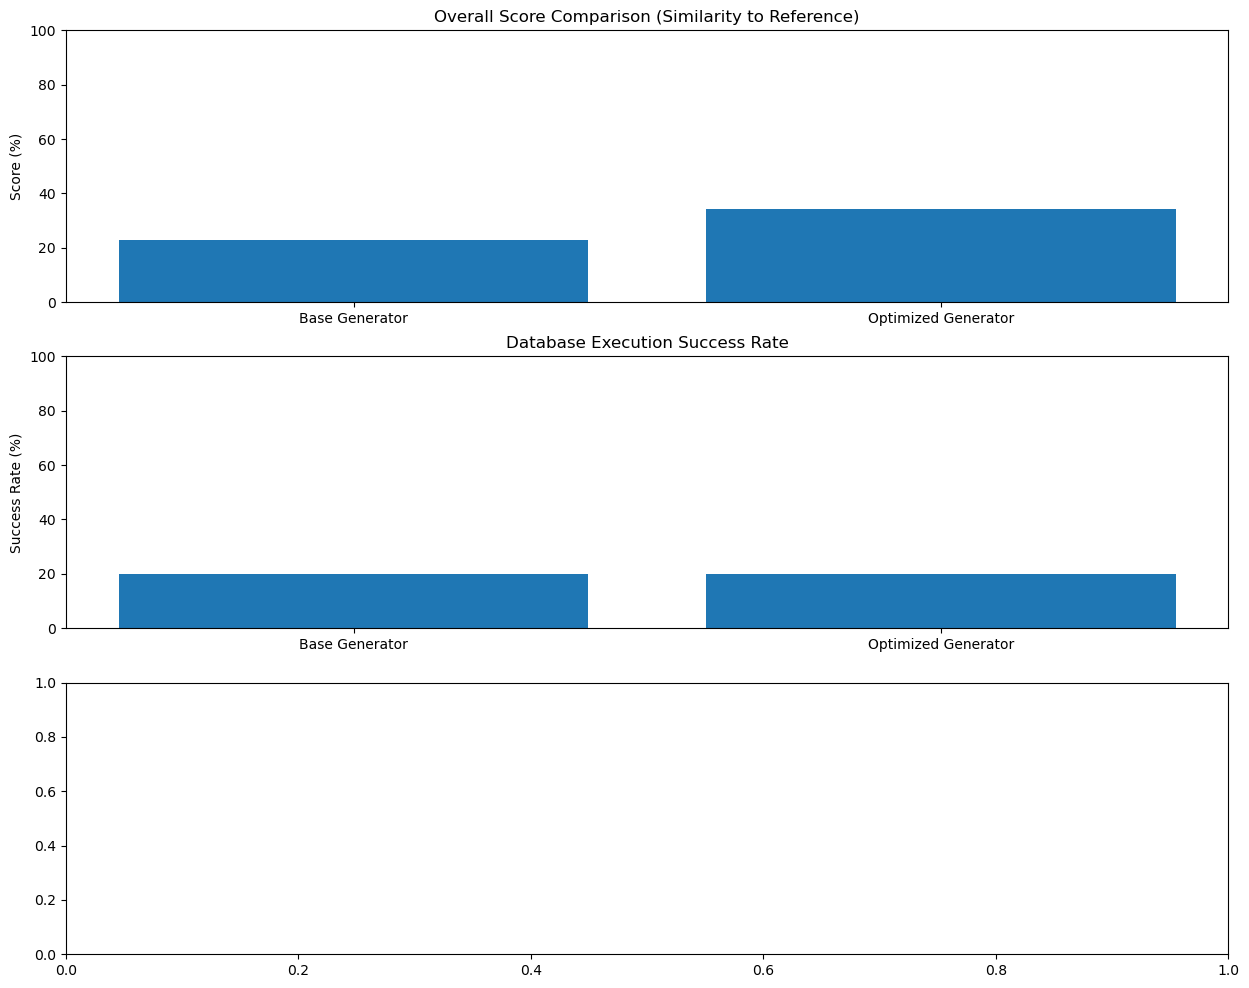

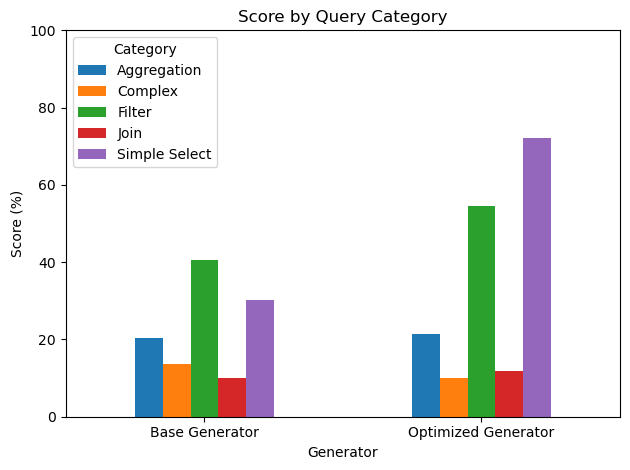


Detailed comparison for a few problems:

Category: Join
Question: Show the price-to-earnings ratio and dividend yield for each company.
Reference Query: SELECT s.symbol, s.name, l.pe, r.dividend_yield FROM symbols s JOIN last_quote_update l ON s.symbol = l.symbol AND s.exchange = l.exchange LEFT JOIN ratios r ON s.symbol = r.symbol;
Base Generator: ```sql
SELECT 
    symbol, provider, eps, p_e, 
    cash_flow.revenue, cash_flow.gross_profit, 
    cash_flow.basis, cash_flow.net_profit, 
    cash_flow.cash_flow, cash_flow.interest,
    cash_flow.tot_debt, cash_flow.total_equity, 
    cash_flow.total_liability, cash_flow.total_cash_flow,
    cash_flow.fund_flow, cash_flow.gross_profit,
    cash_flow.gross_profit / eps AS p_pe,
    cash_flow.dividends_per_share AS dps,
    cash_flow.dividends_per_share / p_pe AS dividend_yield
FROM 
    income
WHERE 
    eps IS NOT NULL AND p_e IS NOT NULL;
``` (Score: 0.00, DB Success: False)
Optimized Generator: ```sql
SELECT 
    symbol,
    revenue / 

In [4]:
import dspy
import time
import pandas as pd
import matplotlib.pyplot as plt
from sqlalchemy import create_engine

# Configure DSPy with your local Ollama model
dspy.configure(lm=dspy.LM('ollama_chat/deepseek-r1:1.5b', api_base='http://localhost:11434', api_key=''))

# Database configuration
db_config = {
    'host': 'host.docker.internal',
    'port': 5432,
    'user': 'puntal',
    'password': '12345678',
    'database': 'brownberg'
}

# Create SQLAlchemy engine for database connection
engine = create_engine(
    f"postgresql://{db_config['user']}:{db_config['password']}@{db_config['host']}:{db_config['port']}/{db_config['database']}"
)

# Extract schema from database or use predefined schema based on SQLAlchemy models
def get_schema():
    schema = """
    CREATE TABLE last_quote_update (
        provider VARCHAR(20),
        symbol VARCHAR(20),
        exchange VARCHAR(10),
        last_timestamp TIMESTAMP,
        last_price DECIMAL(18, 6),
        bid DECIMAL(18, 6),
        ask DECIMAL(18, 6),
        open DECIMAL(18, 6),
        high DECIMAL(18, 6),
        low DECIMAL(18, 6),
        close DECIMAL(18, 6),
        volume BIGINT,
        change DECIMAL(18, 6),
        change_percent DECIMAL(10, 4),
        year_high DECIMAL(18, 6),
        year_low DECIMAL(18, 6),
        price_avg50 DECIMAL(18, 6),
        price_avg200 DECIMAL(18, 6),
        market_cap DECIMAL(20, 2),
        shares_outstanding BIGINT,
        eps DECIMAL(10, 4),
        pe DECIMAL(10, 4),
        prev_close DECIMAL(18, 6),
        exchange_volume BIGINT,
        earnings_announcement TIMESTAMP,
        PRIMARY KEY (provider, symbol, exchange)
    );

    CREATE TABLE symbols (
        symbol VARCHAR(20),
        exchange VARCHAR(20),
        name VARCHAR(100) NOT NULL,
        sector VARCHAR(100),
        industry VARCHAR(100),
        country VARCHAR(100) NOT NULL,
        is_etf BOOLEAN NOT NULL DEFAULT FALSE,
        actively_trading BOOLEAN NOT NULL DEFAULT TRUE,
        is_fund BOOLEAN NOT NULL DEFAULT FALSE,
        PRIMARY KEY (symbol, exchange)
    );

    CREATE TABLE income (
        symbol VARCHAR(20),
        provider VARCHAR(20),
        fiscal_period VARCHAR(20),
        fiscal_year INTEGER,
        reported_currency VARCHAR(10),
        revenue DECIMAL(30, 2),
        gross_profit DECIMAL(30, 2),
        gross_profit_margin DECIMAL(10, 4),
        ebitda DECIMAL(30, 2),
        ebitda_margin DECIMAL(10, 4),
        total_operating_income DECIMAL(30, 2),
        operating_income_margin DECIMAL(10, 4),
        consolidated_net_income DECIMAL(30, 2),
        net_income_margin DECIMAL(10, 4),
        basic_earnings_per_share DECIMAL(10, 4),
        diluted_earnings_per_share DECIMAL(10, 4),
        link TEXT,
        PRIMARY KEY (symbol, provider, fiscal_period, fiscal_year)
    );

    CREATE TABLE cash_flow (
        symbol VARCHAR(20),
        provider VARCHAR(20),
        fiscal_period VARCHAR(20),
        fiscal_year INTEGER,
        reported_currency VARCHAR(10),
        free_cash_flow DECIMAL(30, 2),
        operating_cash_flow DECIMAL(30, 2),
        capital_expenditure DECIMAL(30, 2),
        link TEXT,
        PRIMARY KEY (symbol, provider, fiscal_period, fiscal_year)
    );

    CREATE TABLE balance (
        symbol VARCHAR(20),
        provider VARCHAR(20),
        fiscal_period VARCHAR(20),
        fiscal_year INTEGER,
        reported_currency VARCHAR(10),
        total_assets DECIMAL(30, 2),
        total_current_assets DECIMAL(30, 2),
        non_current_assets DECIMAL(30, 2),
        total_current_liabilities DECIMAL(30, 2),
        short_term_debt DECIMAL(30, 2),
        long_term_debt DECIMAL(30, 2),
        total_liabilities DECIMAL(30, 2),
        total_debt DECIMAL(30, 2),
        net_debt DECIMAL(30, 2),
        total_investments DECIMAL(30, 2),
        total_common_equity DECIMAL(30, 2),
        common_stock DECIMAL(30, 2),
        preferred_stock DECIMAL(30, 2),
        link TEXT,
        PRIMARY KEY (symbol, provider, fiscal_period, fiscal_year)
    );

    CREATE TABLE ratios (
        symbol VARCHAR(20),
        provider VARCHAR(20),
        fiscal_period VARCHAR(20),
        fiscal_year INTEGER,
        reported_currency VARCHAR(10),
        return_on_equity DECIMAL(10, 4),
        return_on_capital_employed DECIMAL(10, 4),
        return_on_assets DECIMAL(10, 4),
        dividend_per_share DECIMAL(10, 4),
        dividend_yield DECIMAL(10, 4),
        payout_ratio DECIMAL(10, 4),
        dividend_payout_ratio DECIMAL(10, 4),
        price_book_value_ratio DECIMAL(10, 4),
        price_earnings_ratio DECIMAL(10, 4),
        price_to_free_cash_flows_ratio DECIMAL(10, 4),
        price_cash_flow_ratio DECIMAL(10, 4),
        PRIMARY KEY (symbol, provider, fiscal_period, fiscal_year)
    );

    CREATE TABLE peers (
        symbol VARCHAR(20),
        provider VARCHAR(20),
        peers_list TEXT,
        PRIMARY KEY (symbol, provider)
    );
    """
    return schema

# Define our Text-to-SQL signature
class TextToSQL(dspy.Signature):
    """Convert natural language question to SQL query for financial database."""
    schema: str = dspy.InputField(desc="The financial database schema with stock market and company data")
    question: str = dspy.InputField(desc="The natural language question about financial data")
    sql_query: str = dspy.OutputField(desc="The SQL query that answers the financial question")

# Define our SQL module
class SQLGenerator(dspy.Module):
    def __init__(self):
        super().__init__()
        self.generate_sql = dspy.ChainOfThought(TextToSQL)
    
    def forward(self, schema, question):
        result = self.generate_sql(schema=schema, question=question)
        return dspy.Prediction(
            schema=schema,
            question=question,
            sql_query=result.sql_query
        )

# Create training examples specific to financial data
train_examples = [
    {
        "question": "List all symbols and their names.",
        "sql_query": "SELECT symbol, name FROM symbols;"
    },
    {
        "question": "What is the average EPS of all stocks?",
        "sql_query": "SELECT AVG(eps) FROM last_quote_update;"
    },
    {
        "question": "Which companies are in the Technology sector?",
        "sql_query": "SELECT symbol, name FROM symbols WHERE sector = 'Technology';"
    },
    {
        "question": "What is the average revenue for companies in the last fiscal year?",
        "sql_query": "SELECT AVG(revenue) FROM income WHERE fiscal_period = 'FY' AND fiscal_year = (SELECT MAX(fiscal_year) FROM income);"
    },
    {
        "question": "Which company has the highest market cap?",
        "sql_query": "SELECT symbol, market_cap FROM last_quote_update ORDER BY market_cap DESC LIMIT 1;"
    },
    {
        "question": "List companies with their P/E ratios.",
        "sql_query": "SELECT s.symbol, s.name, l.pe FROM symbols s JOIN last_quote_update l ON s.symbol = l.symbol AND s.exchange = l.exchange;"
    },
    {
        "question": "What is the total debt of each company in the most recent fiscal period?",
        "sql_query": "SELECT symbol, total_debt FROM balance WHERE fiscal_period = 'FY' AND fiscal_year = (SELECT MAX(fiscal_year) FROM balance);"
    },
    {
        "question": "Which companies have a positive free cash flow?",
        "sql_query": "SELECT c.symbol, s.name, c.free_cash_flow FROM cash_flow c JOIN symbols s ON c.symbol = s.symbol WHERE c.free_cash_flow > 0;"
    }
]

# Create test examples (different from training examples)
test_examples = [
    {
        "category": "Simple Select",
        "question": "List all companies in the Healthcare sector.",
        "sql_query": "SELECT symbol, name FROM symbols WHERE sector = 'Healthcare';"
    },
    {
        "category": "Simple Select",
        "question": "What are the different sectors in the database?",
        "sql_query": "SELECT DISTINCT sector FROM symbols WHERE sector IS NOT NULL;"
    },
    {
        "category": "Filter",
        "question": "Which stocks have a price above $100?",
        "sql_query": "SELECT symbol, last_price FROM last_quote_update WHERE last_price > 100;"
    },
    {
        "category": "Filter",
        "question": "Show companies with negative net income.",
        "sql_query": "SELECT symbol, consolidated_net_income FROM income WHERE consolidated_net_income < 0;"
    },
    {
        "category": "Aggregation",
        "question": "What is the average market cap by sector?",
        "sql_query": "SELECT s.sector, AVG(l.market_cap) as avg_market_cap FROM symbols s JOIN last_quote_update l ON s.symbol = l.symbol AND s.exchange = l.exchange GROUP BY s.sector;"
    },
    {
        "category": "Aggregation",
        "question": "What is the total revenue of all technology companies?",
        "sql_query": "SELECT SUM(i.revenue) FROM income i JOIN symbols s ON i.symbol = s.symbol WHERE s.sector = 'Technology';"
    },
    {
        "category": "Join",
        "question": "Show the price-to-earnings ratio and dividend yield for each company.",
        "sql_query": "SELECT s.symbol, s.name, l.pe, r.dividend_yield FROM symbols s JOIN last_quote_update l ON s.symbol = l.symbol AND s.exchange = l.exchange LEFT JOIN ratios r ON s.symbol = r.symbol;"
    },
    {
        "category": "Join",
        "question": "Which companies have higher debt than their total assets?",
        "sql_query": "SELECT b.symbol, s.name FROM balance b JOIN symbols s ON b.symbol = s.symbol WHERE b.total_debt > b.total_assets;"
    },
    {
        "category": "Complex",
        "question": "What is the correlation between market cap and revenue?",
        "sql_query": "SELECT CORR(l.market_cap, i.revenue) FROM last_quote_update l JOIN income i ON l.symbol = i.symbol;"
    },
    {
        "category": "Complex",
        "question": "Which companies have shown consistent revenue growth over the last 3 fiscal years?",
        "sql_query": "WITH yearly_revenue AS (SELECT symbol, fiscal_year, revenue, LAG(revenue) OVER (PARTITION BY symbol ORDER BY fiscal_year) as prev_revenue FROM income WHERE fiscal_period = 'FY') SELECT DISTINCT s.symbol, s.name FROM yearly_revenue y JOIN symbols s ON y.symbol = s.symbol WHERE y.revenue > y.prev_revenue GROUP BY s.symbol, s.name HAVING COUNT(*) >= 2;"
    }
]

# Add schema to all examples
schema = get_schema()
for example in train_examples:
    example["schema"] = schema

for example in test_examples:
    example["schema"] = schema

# Convert training data to DSPy format
trainset = [dspy.Example(schema=ex["schema"], question=ex["question"], sql_query=ex["sql_query"]).with_inputs('schema', 'question') for ex in train_examples]

# Create the SQL generators
base_sql_generator = SQLGenerator()

# Define evaluation function
def evaluate_sql_query(predicted_query, reference_query):
    """More robust evaluation for SQL queries"""
    # Handle null, empty or malformed responses
    if not predicted_query or not isinstance(predicted_query, str):
        return 0.0
    
    # Normalize queries
    def normalize_query(query):
        # Remove extra whitespace and make lowercase
        query = ' '.join(query.lower().split())
        # Remove trailing semicolons
        query = query.rstrip(';')
        return query
    
    pred_norm = normalize_query(predicted_query)
    ref_norm = normalize_query(reference_query)
    
    # Exact match
    if pred_norm == ref_norm:
        return 1.0
    
    # Check key components
    components = ['select', 'from', 'where', 'join', 'group by', 'having', 'order by', 'limit']
    score = 0
    total = 0
    
    for component in components:
        if component in pred_norm and component in ref_norm:
            # If both have the component, check what comes after
            try:
                pred_part = pred_norm.split(component)[1].split(next((c for c in components if c in pred_norm.split(component)[1]), ''))[0].strip()
                ref_part = ref_norm.split(component)[1].split(next((c for c in components if c in ref_norm.split(component)[1]), ''))[0].strip()
                
                # Basic similarity score for this component
                similarity = len(set(pred_part.split()) & set(ref_part.split())) / max(len(set(pred_part.split())), len(set(ref_part.split()))) if pred_part and ref_part else 0
                score += similarity
                total += 1
            except Exception as e:
                # Fallback to simpler comparison if the complex parsing fails
                pred_words = set(pred_norm.split())
                ref_words = set(ref_norm.split())
                return len(pred_words.intersection(ref_words)) / len(pred_words.union(ref_words))
        elif component in pred_norm or component in ref_norm:
            # If only one has the component, penalize
            total += 1
    
    return score / total if total > 0 else 0

# Define a metric for the optimizer
def sql_accuracy(example, pred):
    """Metric for SQL query correctness."""
    return evaluate_sql_query(pred.sql_query, example.sql_query)

# Set up the optimizer
optimizer = dspy.MIPROv2(
    metric=sql_accuracy,
    auto="light",
    num_threads=1
)

# Compile/optimize the SQL generator
try:
    print("Optimizing SQL generator...")
    optimized_sql_generator = optimizer.compile(
        base_sql_generator,
        trainset=trainset
    )
    print("Optimization complete!")
except Exception as e:
    print(f"Optimization error: {str(e)}")
    import traceback
    traceback.print_exc()
    optimized_sql_generator = base_sql_generator
    print("Using unoptimized generator instead.")

# Function to evaluate a generator on the test set
def evaluate_generator(generator, test_data, generator_name="Generator"):
    results = []
    
    for i, problem in enumerate(test_data):
        print(f"Evaluating {generator_name} on problem {i+1}/{len(test_data)}...")
        
        start_time = time.time()
        try:
            # Run the generator
            result = generator(schema=problem["schema"], question=problem["question"])
            
            # Get the SQL query
            predicted_query = result.sql_query
            
            # Calculate score
            score = evaluate_sql_query(predicted_query, problem["sql_query"])
            
            # Calculate time
            elapsed = time.time() - start_time
            
            # Try executing the query against the actual database (if possible)
            db_success = False
            db_result = None
            try:
                db_result = pd.read_sql(predicted_query, engine)
                db_success = True
            except Exception as db_error:
                db_result = str(db_error)
            
            results.append({
                "category": problem["category"],
                "question": problem["question"],
                "reference_query": problem["sql_query"],
                "predicted_query": predicted_query,
                "score": score,
                "time": elapsed,
                "generator": generator_name,
                "db_success": db_success,
                "db_result": db_result
            })
            
            print(f"  Question: {problem['question']}")
            print(f"  Predicted: {predicted_query}")
            print(f"  Reference: {problem['sql_query']}")
            print(f"  Score: {score:.2f}")
            print(f"  Time: {elapsed:.2f}s")
            print(f"  DB Success: {db_success}")
            if db_success:
                print(f"  Result rows: {len(db_result)}")
            print()
            
        except Exception as e:
            print(f"Error evaluating problem: {str(e)}")
            results.append({
                "category": problem["category"],
                "question": problem["question"],
                "reference_query": problem["sql_query"],
                "predicted_query": "ERROR",
                "score": 0,
                "time": time.time() - start_time,
                "generator": generator_name,
                "db_success": False,
                "db_result": str(e)
            })
    
    return pd.DataFrame(results)

# Execute both generators on test examples
print("\nEvaluating base generator...")
base_results = evaluate_generator(base_sql_generator, test_examples, "Base Generator")

print("\nEvaluating optimized generator...")
optimized_results = evaluate_generator(optimized_sql_generator, test_examples, "Optimized Generator")

# Combine results
all_results = pd.concat([base_results, optimized_results])

# Calculate overall scores
base_score = base_results["score"].mean() * 100
optimized_score = optimized_results["score"].mean() * 100

print(f"\nBase Generator Score: {base_score:.2f}%")
print(f"Optimized Generator Score: {optimized_score:.2f}%")

# Calculate success rates (actually working queries against the database)
base_success_rate = base_results["db_success"].mean() * 100
optimized_success_rate = optimized_results["db_success"].mean() * 100

print(f"\nBase Generator DB Success Rate: {base_success_rate:.2f}%")
print(f"Optimized Generator DB Success Rate: {optimized_success_rate:.2f}%")

# Calculate category-wise scores
category_scores = all_results.groupby(["generator", "category"])["score"].mean() * 100
category_scores = category_scores.unstack()

# Visualize results
plt.figure(figsize=(15, 12))

# Overall score comparison
plt.subplot(3, 1, 1)
plt.bar(["Base Generator", "Optimized Generator"], [base_score, optimized_score])
plt.title("Overall Score Comparison (Similarity to Reference)")
plt.ylabel("Score (%)")
plt.ylim(0, 100)

# DB Success rate comparison
plt.subplot(3, 1, 2)
plt.bar(["Base Generator", "Optimized Generator"], [base_success_rate, optimized_success_rate])
plt.title("Database Execution Success Rate")
plt.ylabel("Success Rate (%)")
plt.ylim(0, 100)

# Category-wise score comparison
plt.subplot(3, 1, 3)
category_scores.plot(kind="bar")
plt.title("Score by Query Category")
plt.ylabel("Score (%)")
plt.xlabel("Generator")
plt.ylim(0, 100)
plt.xticks(rotation=0)
plt.legend(title="Category")

plt.tight_layout()
plt.savefig('financial_sql_performance.png')
plt.show()

# Show detailed comparisons
print("\nDetailed comparison for a few problems:")
for category in set(example["category"] for example in test_examples):
    # Get one example from each category
    example = next(ex for ex in test_examples if ex["category"] == category)
    
    base_result = base_results[base_results["question"] == example["question"]].iloc[0]
    optimized_result = optimized_results[optimized_results["question"] == example["question"]].iloc[0]
    
    print(f"\nCategory: {category}")
    print(f"Question: {example['question']}")
    print(f"Reference Query: {example['sql_query']}")
    print(f"Base Generator: {base_result['predicted_query']} (Score: {base_result['score']:.2f}, DB Success: {base_result['db_success']})")
    print(f"Optimized Generator: {optimized_result['predicted_query']} (Score: {optimized_result['score']:.2f}, DB Success: {optimized_result['db_success']})")